#**US Airline Sentiment Project - Catalfio**#

##**Data Summary**##

**Background and Context:**

Twitter possesses 330 million monthly active users, which allows businesses to reach a broad population and connect with customers without intermediaries. On the other hand, there’s so much information that it’s difficult for brands to quickly detect negative social mentions that could harm their business.

That's why sentiment analysis/classification, which involves monitoring emotions in conversations on social media platforms, has become a key strategy in social media marketing.


Listening to how customers feel about the product/service on Twitter allows companies to understand their audience, keep on top of what’s being said about their brand and their competitors, and discover new trends in the industry.


**Data Description:**

A sentiment analysis job about the problems of each major U.S. airline. Twitter data was scraped from February of 2015 and contributors were asked to first classify positive, negative, and neutral tweets, followed by categorizing negative reasons (such as "late flight" or "rude service").


**Dataset:**

**The dataset has the following columns:**

tweet_id                                                           
airline_sentiment                                               
airline_sentiment_confidence                               
negativereason                                                   
negativereason_confidence                                    
airline                                                                    
airline_sentiment_gold                                              
name     
negativereason_gold 
retweet_count
text
tweet_coord
tweet_created
tweet_location 
user_timezone

**Objective:**

To implement the techniques learned as a part of the course.

**Steps:**

Import the necessary libraries

Get the data

Explore the data

Plot the wordcloud based on the relevant column

Do pre-processing

Noise removal (Special character, html tags, numbers, stopword removal)

Lowercasing

Stemming / lemmatization

Text to number: Vectorization

CountVectorizer

TfidfVectorizer

Build Machine Learning Model for Text Classification.

Optimize the parameter

Plot the worldcloud based on the most important features

Check the performance of the model

Summary

**Opinion:**

After an initial scan of the data, i would expect there to be more negative sentiments vs positive within each airline.  It seems as the overwhelming majority of reviews are negative.

In [1]:
!pip install contractions

In [2]:
# install and import necessary libraries.

#!pip install contractions

import re, string, unicodedata                          # Import Regex, string and unicodedata.
import contractions                                     # Import contractions library.
from bs4 import BeautifulSoup                           # Import BeautifulSoup.

import numpy as np                                      # Import numpy.
import pandas as pd                                     # Import pandas.
import nltk                                             # Import Natural Language Tool-Kit.

nltk.download('stopwords')                              # Download Stopwords.
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords                       # Import stopwords.
from nltk.tokenize import word_tokenize, sent_tokenize  # Import Tokenizer.
from nltk.stem.wordnet import WordNetLemmatizer         # Import Lemmatizer.
import matplotlib.pyplot as plt                         # Import plt for visualization

from collections import Counter
import seaborn as sns  

import warnings
# Suppress warnings
warnings.filterwarnings('ignore')                                                 # Used for plotting

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
data=pd.read_csv('drive/My Drive/Tweets.csv')

In [5]:
data.shape                                               # print shape of data.

(14640, 15)

In [6]:
data.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [7]:
data.head()                                              # Print first 5 rows of data.

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


##**Exploratory Data Analysis**##

In [8]:
data.drop(["user_timezone", "tweet_location", "tweet_created","tweet_coord", "retweet_count", "negativereason_gold", "name", "airline_sentiment_gold","negativereason_confidence", "airline_sentiment_confidence", "tweet_id"], axis=1, inplace=True)

In [9]:
data.isnull().sum(axis=0)

airline_sentiment       0
negativereason       5462
airline                 0
text                    0
dtype: int64

In [10]:
data.shape                                            #Shape of the data

(14640, 4)

In [11]:
pd.set_option('display.max_colwidth', None) # Display full dataframe information (Non-turncated Text column.)

data.head()                                 # Check first 5 rows of data

,airline_sentiment,negativereason,airline,text
0,neutral,NaN,Virgin America,@VirginAmerica What @dhepburn said.
1,positive,NaN,Virgin America,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,NaN,Virgin America,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,Bad Flight,Virgin America,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,Can't Tell,Virgin America,@VirginAmerica and it's a really big bad thing about it


In [12]:
Positive_sent = data[data['airline_sentiment']=='positive']
Negative_sent = data[data['airline_sentiment']=='negative']
Neutral_sent = data[data['airline_sentiment']=='neutral']

In [13]:
print('Number of tweets with positive sentiment', Positive_sent['airline_sentiment'].count())
print('Number of tweets with negative sentiment', Negative_sent['airline_sentiment'].count())
print('Number of tweets with neutral sentiment', Neutral_sent['airline_sentiment'].count())

Number of tweets with positive sentiment 2363
Number of tweets with negative sentiment 9178
Number of tweets with neutral sentiment 3099


In [14]:
data["airline"].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

In [15]:
data["airline_sentiment"].value_counts()

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [16]:
data["negativereason"].value_counts()

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

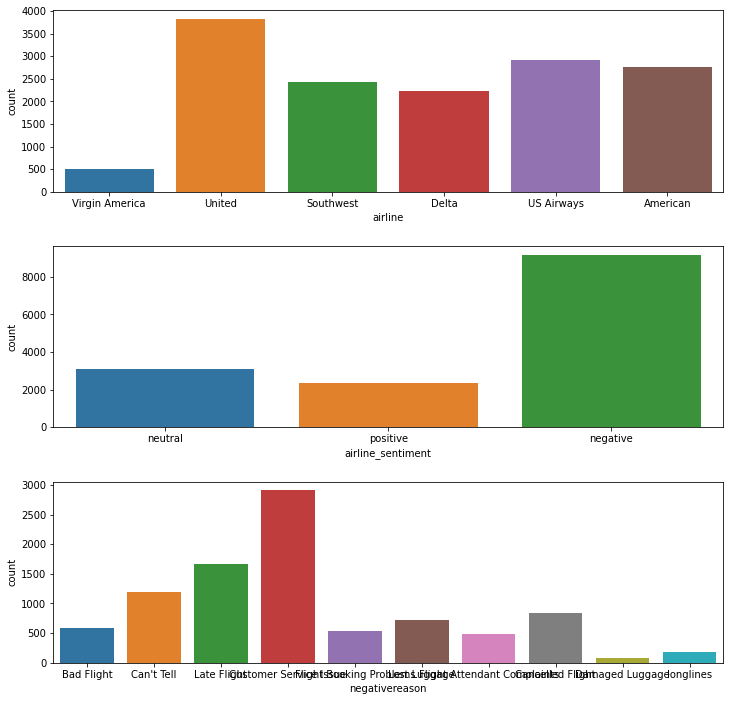

In [17]:
fig, ax = plt.subplots(3,1,figsize=(12,12))
plt.subplots_adjust(hspace=0.3)
sns.countplot(x='airline', data=data, ax=ax[0])
sns.countplot(x='airline_sentiment', data=data, ax=ax[1])
sns.countplot(x='negativereason',data=data,ax=ax[2])



Text(0.5, 0.98, 'Characters in message')

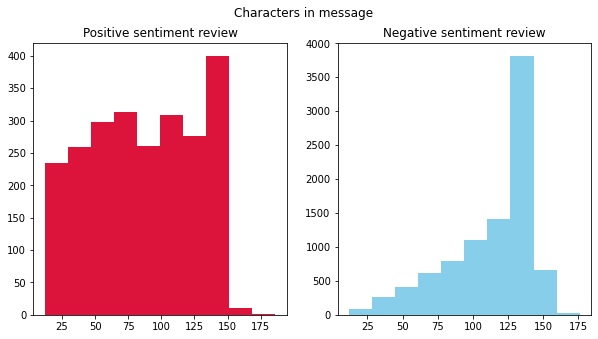

In [18]:
#Number of characters in review
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
data_len = data[data['airline_sentiment']=='positive']['text'].str.len()
ax1.hist(data_len,color='crimson')
ax1.set_title('Positive sentiment review')
data_len = data[data['airline_sentiment']=='negative']['text'].str.len()
ax2.hist(data_len,color='skyblue')
ax2.set_title('Negative sentiment review')
fig.suptitle('Characters in message')

Text(0.5, 0.98, 'Words in a review')

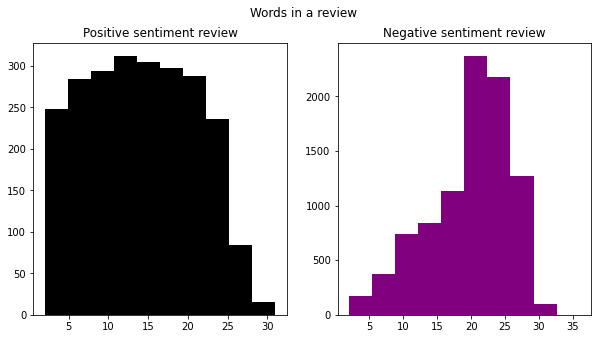

In [19]:
#Number of words in a review
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
data_len = data[data['airline_sentiment']=='positive']['text'].str.split().map(lambda x: len(x))
ax1.hist(data_len, color='black')
ax1.set_title('Positive sentiment review')
data_len = data[data['airline_sentiment']=='negative']['text'].str.split().map(lambda x: len(x))
ax2.hist(data_len,color='purple')
ax2.set_title('Negative sentiment review')
fig.suptitle('Words in a review')

###**Word Cloud based on Positive and Negative sentiment**###

In [20]:
import wordcloud
def show_wordcloud(Positive_sent, title):
    text = ' '.join(Positive_sent['text'].astype(str).tolist())
    stopwords = set(wordcloud.STOPWORDS)
    
    fig_wordcloud = wordcloud.WordCloud(stopwords=stopwords,background_color='white',
                    colormap='viridis', width=800, height=600).generate(text)
    
    plt.figure(figsize=(14,11), frameon=True)
    plt.imshow(fig_wordcloud)  
    plt.axis('off')
    plt.title(title, fontsize=30)
    plt.show()

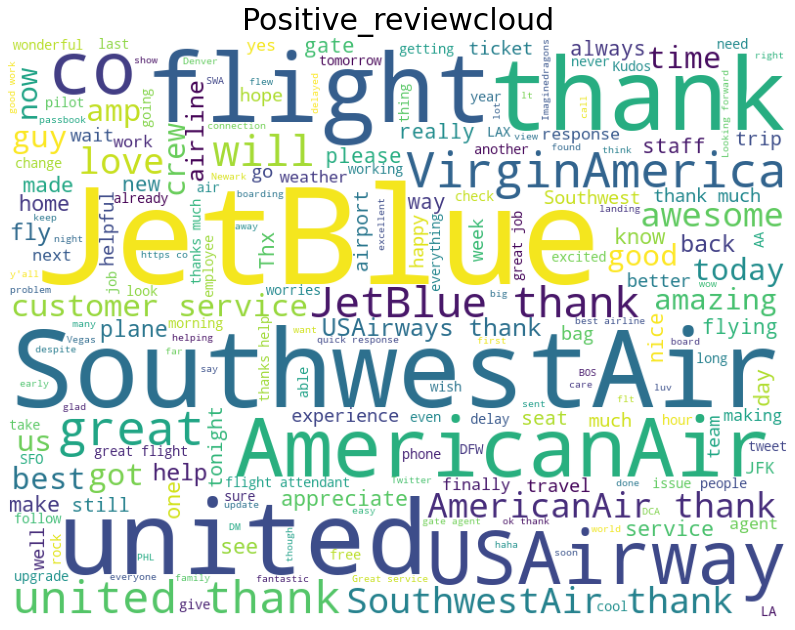

In [21]:
show_wordcloud(Positive_sent, "Positive_reviewcloud")

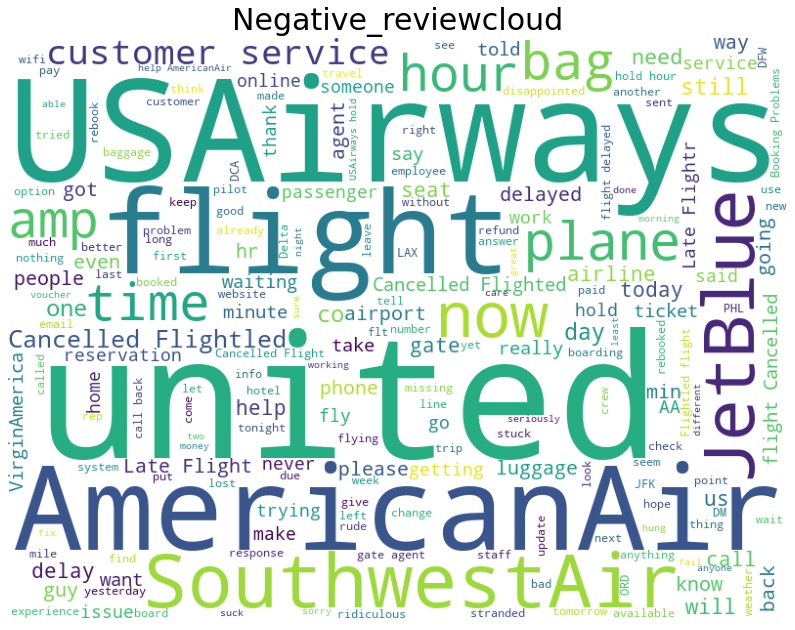

In [22]:
show_wordcloud(Negative_sent, "Negative_reviewcloud")

###**EDA Conclusion:**###

We will drop all columns except 4, airline, airline_sentiment, text and negative reason as these are the only important columns at this time.

The new shape of the data is 14640 rows and 4 columns.

There are 5462 missing values in the "negativereason' column.  We will keep these values assuming that positive and most neutral reviews would not include a 'negativereason'.

**Graph 1 - Airlines:**

There are 6 different airlines found within the data with the following value counts:  United 3822, US Airways 2913, American 2759, Southwest 2420, Delta 2222, Virgin America 504.

**Graph 2 - Airline Sentiment:**

Number of tweets with positive sentiment 2363.  Number of tweets with negative sentiment 9178.  Number of tweets with neutral sentiment 3099.

**Graph 3 - Negative Reason:**

This graph depicts the following value counts:  Customer Service Issue 2910, Late Flight 1665, Can't Tell 1190, Cancelled Flight 847, Lost Luggage 724, Bad Flight 580, Flight Booking Problems 529, Flight Attendant Complaints 481, longlines 178, Damaged Luggage 74

**Graph 4 - Positive vs Negative Sentiment Character Count**

There is a much higher character count in negative sentiment reviews in relation to positive sentiment reviews.

**Graph 5 - Positive vs Negative Sentiment Word Count**

There is a much higher word count in negative sentiment reviews in relation to positive sentiment reviews.

I have provided 2 word cloud graphs, one for the most used postive used words and one for the most negative used words.  Some of the most common positively used words are "thank", "good", "great", "customer service".  Some of the most negatively used words are "canceled flight", "late flight", and "delayed".














##**Understanding of Data Columns**##

In [23]:
data.drop(["airline", "negativereason"], axis=1, inplace=True)

In [24]:
data.shape

(14640, 2)

In [25]:
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


Dropping the remaining columns other than the two required for model building, airline_sentiment and text.

##**Data Pre - Processing**##


Remove html tags.

Replace contractions in string. (e.g. replace I'm --> I am) and so on.

Remove numbers.

Tokenization.

To remove Stopwords.

Lemmatized data.

We have used the NLTK library to tokenize words, remove stopwords and lemmatize the remaining words.

In [26]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")                    
    return soup.get_text()

data['text'] = data['text'].apply(lambda x: strip_html(x))

data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials to the experience... tacky.
2,neutral,@VirginAmerica I didn't today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it's a really big bad thing about it


In [27]:
def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

data['text'] = data['text'].apply(lambda x: replace_contractions(x))

data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it is a really big bad thing about it


In [28]:
def remove_numbers(text):
  text = re.sub(r'\d+', '', text)
  return text

data['text'] = data['text'].apply(lambda x: remove_numbers(x))

data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you have added commercials to the experience... tacky.
2,neutral,@VirginAmerica I did not today... Must mean I need to take another trip!
3,negative,"@VirginAmerica it is really aggressive to blast obnoxious ""entertainment"" in your guests' faces & they have little recourse"
4,negative,@VirginAmerica and it is a really big bad thing about it


In [29]:
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data

In [30]:
data.head()  

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]"
2,neutral,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]"
3,negative,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]"
4,negative,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"


In [31]:
stopwords = stopwords.words('english')

customlist = ['not', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
        "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',
        "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn',
        "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

# Set custom stop-word's list as not, couldn't etc. words matter in Sentiment, so not removing them from original data.

stopwords = list(set(stopwords) - set(customlist)) 

data.head()

,airline_sentiment,text
0,neutral,"[@, VirginAmerica, What, @, dhepburn, said, .]"
1,positive,"[@, VirginAmerica, plus, you, have, added, commercials, to, the, experience, ..., tacky, .]"
2,neutral,"[@, VirginAmerica, I, did, not, today, ..., Must, mean, I, need, to, take, another, trip, !]"
3,negative,"[@, VirginAmerica, it, is, really, aggressive, to, blast, obnoxious, ``, entertainment, '', in, your, guests, ', faces, &, they, have, little, recourse]"
4,negative,"[@, VirginAmerica, and, it, is, a, really, big, bad, thing, about, it]"


In [32]:
lemmatizer = WordNetLemmatizer()

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)

data.head()

,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus add commercials experience tacky
2,neutral,virginamerica not today must mean need take another trip
3,negative,virginamerica really aggressive blast obnoxious entertainment guests face little recourse
4,negative,virginamerica really big bad thing


**The most Common words in text column**

In [33]:
data['text'] = data.apply(lambda row: nltk.word_tokenize(row['text']), axis=1) # Tokenization of data
top = Counter([item for sublist in data['text'] for item in sublist])
freq = pd.DataFrame(top.most_common(20))
freq.columns = ['Common_words','count']
freq.style.background_gradient(cmap='Reds')

,Common_words,count
0,flight,4835
1,unite,4160
2,not,3905
3,usairways,3051
4,americanair,2961
5,southwestair,2461
6,jetblue,2395
7,get,2120
8,thank,1685
9,http,1155


In [34]:
Positive_sent = data[data['airline_sentiment']=='positive']
Negative_sent = data[data['airline_sentiment']=='negative']

**Finding common words for positive sentiment reviews**

In [35]:
#MosT common positive words
top = Counter([item for sublist in Positive_sent['text'] for item in sublist])
freq_positive = pd.DataFrame(top.most_common(20))
freq_positive.columns = ['Common_words','count']
freq_positive.style.background_gradient(cmap='Greens')

,Common_words,count
0,thank,1064
1,jetblue,595
2,southwestair,576
3,unite,528
4,flight,443
5,americanair,355
6,usairways,276
7,get,255
8,great,236
9,http,217


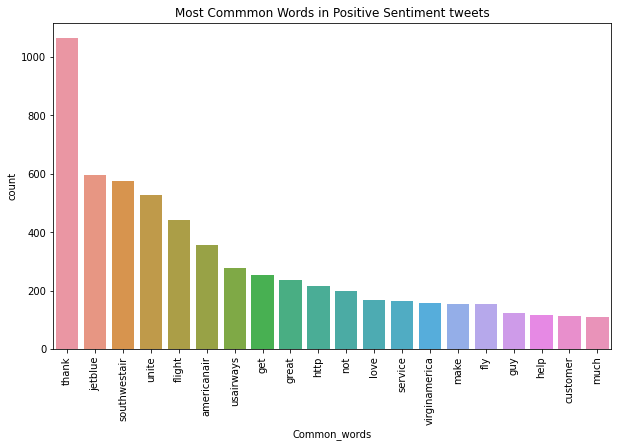

In [36]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Common_words', y='count', 
            data=freq_positive, ax=ax)
plt.title("Most Commmon Words in Positive Sentiment tweets")
plt.xticks(rotation='vertical');

**Finding common words for negative sentiment reviews**

In [37]:
#MosT common negative words
top = Counter([item for sublist in Negative_sent['text'] for item in sublist])
freq_negative = pd.DataFrame(top.most_common(20))
freq_negative.columns = ['Common_words','count']
freq_negative.style.background_gradient(cmap='flare')

,Common_words,count
0,flight,3594
1,not,3324
2,unite,2895
3,usairways,2374
4,americanair,2107
5,get,1521
6,southwestair,1214
7,jetblue,1052
8,cancel,920
9,delay,901


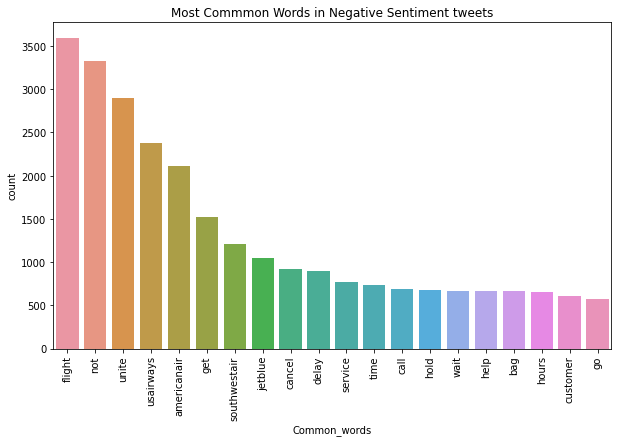

In [38]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='Common_words', y='count', 
            data=freq_negative, ax=ax)
plt.title("Most Commmon Words in Negative Sentiment tweets")
plt.xticks(rotation='vertical');

In [39]:
lemmatizer = WordNetLemmatizer()

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def lemmatize_list(words):
    new_words = []
    for word in words:
      new_words.append(lemmatizer.lemmatize(word, pos='v'))
    return new_words

def normalize(words):
    
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    words = lemmatize_list(words)
    return ' '.join(words)

data['text'] = data.apply(lambda row: normalize(row['text']), axis=1)

data.head()

,airline_sentiment,text
0,neutral,virginamerica dhepburn say
1,positive,virginamerica plus add commercials experience tacky
2,neutral,virginamerica not today must mean need take another trip
3,negative,virginamerica really aggressive blast obnoxious entertainment guests face little recourse
4,negative,virginamerica really big bad thing


##**Vectorization**##

###**Building the model based on CountVectorizer and Random Forest**###

In [40]:
# Vectorization (Convert text data to numbers).
from sklearn.feature_extraction.text import CountVectorizer

bow_vec = CountVectorizer(max_features=2000)                # Keep only 2000 features as number of features will increase the processing time.
data_features = bow_vec.fit_transform(data['text'])

data_features = data_features.toarray()                        # Convert the data features to array.

In [41]:
data_features.shape

(14640, 2000)

In [42]:
labels = data['airline_sentiment']
labels = labels.astype('str')

In [43]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [44]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=70, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=10)))

RandomForestClassifier(n_estimators=70, n_jobs=4)
0.7325819672131147


###**Optimizing the parameter: Number of trees in the random forest model(n_estimators)**###

In [45]:
# Finding optimal number of base learners using k-fold CV ->
base_ln = [x for x in range(1, 25)]
base_ln

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24]

####**Modelling , tuning and Evaluation**#####

In [46]:
# K-Fold Cross - validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

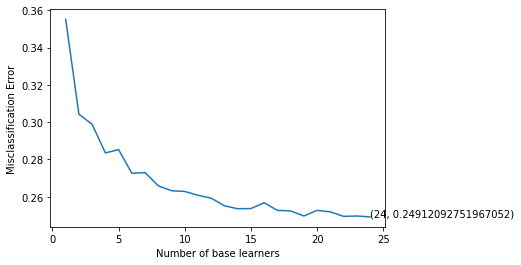

In [47]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                 #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                           #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [48]:
# Training the best model and calculating accuracy on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7700364298724954

In [49]:
result =  clf.predict(X_test)                  #saving the prediction on test data as a result

[[2523  216   75]
 [ 359  440   85]
 [ 164  111  419]]
0.7700364298724953


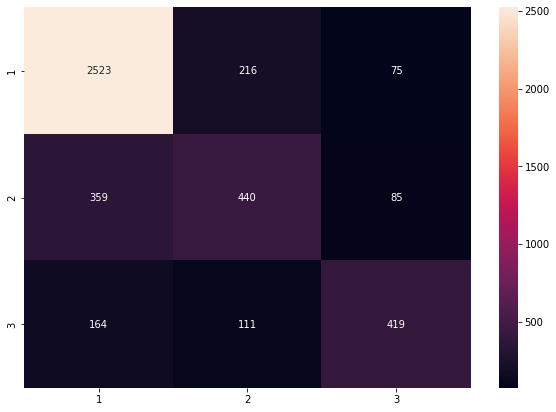

In [50]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

###**Word Cloud of top 20 important features from the CountVectorizer + Random Forest based model**###

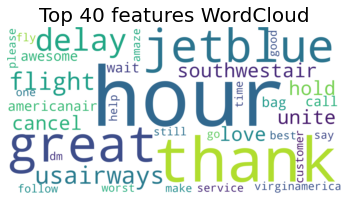

In [51]:
all_features = bow_vec.get_feature_names()              #Instantiate the feature from the vectorizer
top_features=''                                            # Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    top_features+=all_features[i]
    top_features+=' '
    
    

from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",colormap='viridis',width=2000, 
                          height=1000).generate(top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(14, 11), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=20)
plt.axis("off")
plt.show()

###**Term Frequency(TF) - Inverse Document Frequency(IDF)**###

In [52]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=2000)
data_features = vectorizer.fit_transform(data['text'])

data_features = data_features.toarray()

data_features.shape

(14640, 2000)

In [53]:
# Split data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_features, labels, test_size=0.3, random_state=42)

In [54]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import numpy as np

forest = RandomForestClassifier(n_estimators=70, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, labels, cv=5)))

RandomForestClassifier(n_estimators=70, n_jobs=4)
0.7032103825136613


#####**Modelling , tuning and Evaluation**#####

In [55]:
# K - Fold Cross Validation .
cv_scores = []
for b in base_ln:
    clf = RandomForestClassifier(n_estimators = b)
    scores = cross_val_score(clf, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

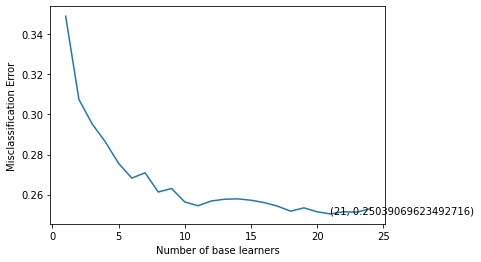

In [56]:
# plotting the error as k increases
error = [1 - x for x in cv_scores]                                              #error corresponds to each nu of estimator
optimal_learners = base_ln[error.index(min(error))]                             #Selection of optimal nu of n_estimator corresponds to minimum error.
plt.plot(base_ln, error)                                                        #Plot between each nu of estimator and misclassification error
xy = (optimal_learners, min(error))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.xlabel("Number of base learners")
plt.ylabel("Misclassification Error")
plt.show()

In [57]:
# Training the best model and calculating error on test data .
clf = RandomForestClassifier(n_estimators = optimal_learners)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7663934426229508

In [58]:
result = clf.predict(X_test)

[[2627  140   47]
 [ 448  375   61]
 [ 240   90  364]]
0.7663934426229508


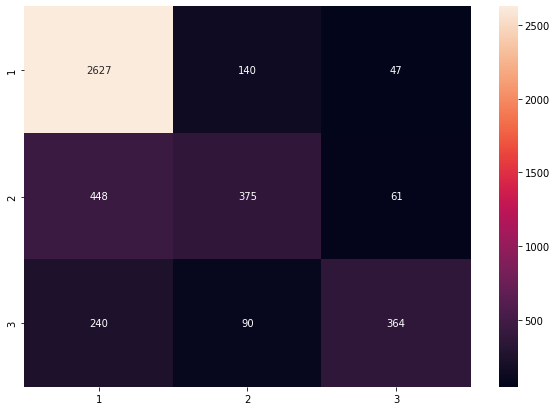

In [59]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.
result =  clf.predict(X_test)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

print(metrics.f1_score(y_test, result,average='micro'))

df_cm = pd.DataFrame(conf_mat, index = [i for i in "123"],
                  columns = [i for i in "123"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

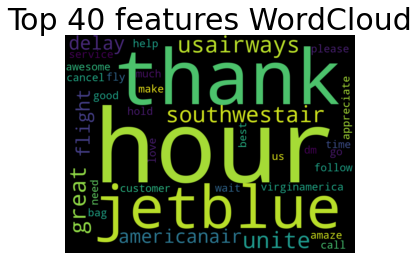

In [60]:
all_features = vectorizer.get_feature_names()                                #Instantiate the feature from the vectorizer
Top_features=''                                                              #Addition of top 40 feature into top_feature after training the model
feat=clf.feature_importances_
features=np.argsort(feat)[::-1]
for i in features[0:40]:
    Top_features+=all_features[i]
    Top_features+=' '
    
  
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="Black",width=1000, 
                          height=750).generate(Top_features)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.figure(1, figsize=(30, 30), frameon='equal')
plt.title('Top 40 features WordCloud', fontsize=30)
plt.axis("off")
plt.show()

**Conclusion and Summary:**

We used a dataset which has reviews in text format and their sentiment 
score as positive, negative or neutral.

The goal was to build a model for text-classification.

We pre-processed the data using various techniques and libraries.

The pre-processed data is converted to numbers (vectorized), so that we can feed the data into the model.

We trained the model and optimized the parameter, which led to an increase the overall accuracy.

After building the classification model, we predicted the results for the test data.

We saw that using the above techniques, our model performed well in perspective of how text classification models perform.

However, we can still increase the accuracy of our model by increasing the dataset we took into account for the model building.

We can also increase the max_feature parameter in the vectorizer.

We can apply other model tuning and hyperparameter tuning techniques, as well as other pre-processing techniques to increase the overall accuracy even further.

The 5 most common words found in the text are flight, unite, not, usairways, americanair.

The 5 most positive common words found in the text are thank, JetBlue, southwestair, unite, flight.

The 5 most negative common words found in the text are flight, not, unite, usairways, americanair.

Our count vectorizor random forest model with 70 n_estimators and 4 n_jobs has an accuracy score of .735 which is close to our goal of .75.  The misclassification error seeems to level between 20 - 25.

After our hyperperameter tuning of the random forest model using optimal learners and can be visualized by the confusion matrix, our accuracy score has increased to .767 which is above our goal of .75.

Some of our top words for the countvectorizor + random forest model are thank, hour, great, and delay.

Our TFIDF random forest model did not perform as well as the count vectorizor using the same parameters, 70 n_estimators and 4 n_jobs. The accuracy score for this model is .695.

However, after our hyperparameter tuning for the TFIDF + random forest model using optimal_learners, our accuracy improved to .765 which is also above our goal of .75.

Some of our top words for the TDIDF + random forest model are hour, thanks, unite, great.


***Created by Stephen Catalfio***